<a href="https://www.kaggle.com/code/niralibijalmodi/digit-recogniser-using-cnn?scriptVersionId=104365555" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Reading the data that has been provided as train and test data

In [3]:
train = pd.read_csv("../input/digit-recognizer/train.csv")
test = pd.read_csv("../input/digit-recognizer/test.csv")

In [4]:
train.shape,test.shape


((42000, 785), (28000, 784))

In [5]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test.tail()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Checking the shape , the training data has 42000 examples and 1-D images with 784 pixels(columns) and one column representing the labels(in this case the digits)

The test data has 28000 examples with 784 pixels without the label colums which will be predicted later.

In [7]:
print(test.dtypes[:10]),print(train.dtypes[:10])

pixel0    int64
pixel1    int64
pixel2    int64
pixel3    int64
pixel4    int64
pixel5    int64
pixel6    int64
pixel7    int64
pixel8    int64
pixel9    int64
dtype: object
label     int64
pixel0    int64
pixel1    int64
pixel2    int64
pixel3    int64
pixel4    int64
pixel5    int64
pixel6    int64
pixel7    int64
pixel8    int64
dtype: object


(None, None)

In [8]:
(784)**0.5

28.0

Since the images are in square form their height and width is 28 pixels.No need of reshaping the images to 32 X 32 pixels due to its already small size.

Now splitting our data of train into x_train and y_train for the model to know what is the input and output

In [9]:
y_train=train['label']
x_train=train.drop('label',axis=1)

In [10]:
x_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

Most important step is to visualize our input data

For that we need to reshape the images to have width and height as separate attributes in shape

In [12]:
import tensorflow as tf

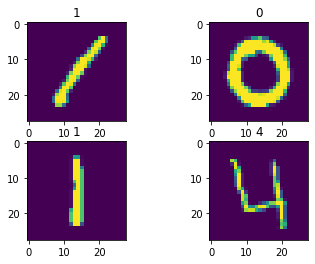

In [13]:




x_train = x_train.values.reshape(42000, 28, 28,1)
for i in range(0,4):
    plt.subplot(2,2,i+1)
    plt.imshow(x_train[i])
    plt.title(y_train[i])

In [14]:
x_train = x_train / 255.0
test = test / 255.0

In [15]:
test = test.values.reshape(-1,28, 28, 1) 
 

In [16]:
y_train1=tf.constant(y_train)
y_train1.dtype

2022-08-28 08:43:55.975676: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


tf.int64

In [17]:
from keras.utils.np_utils import to_categorical

nclasses = y_train.max() - y_train.min() + 1
print("Shape of ytrain before: ", y_train.shape) 
y_train = to_categorical(y_train, num_classes = nclasses)
print("Shape of ytrain after: ", y_train.shape) 


Shape of ytrain before:  (42000,)
Shape of ytrain after:  (42000, 10)


In [18]:
#import tensorflow as tf
#tf.one_hot(y_train1,depth=10)
#Not able to use this as the output type not what is needed

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train,y_train, test_size=0.2,random_state=42)

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPool2D, AvgPool2D,Activation


from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


In [21]:
model = Sequential()

dim = 28
nclasses = 10

model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(dim,dim,1)))
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu',))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(nclasses, activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

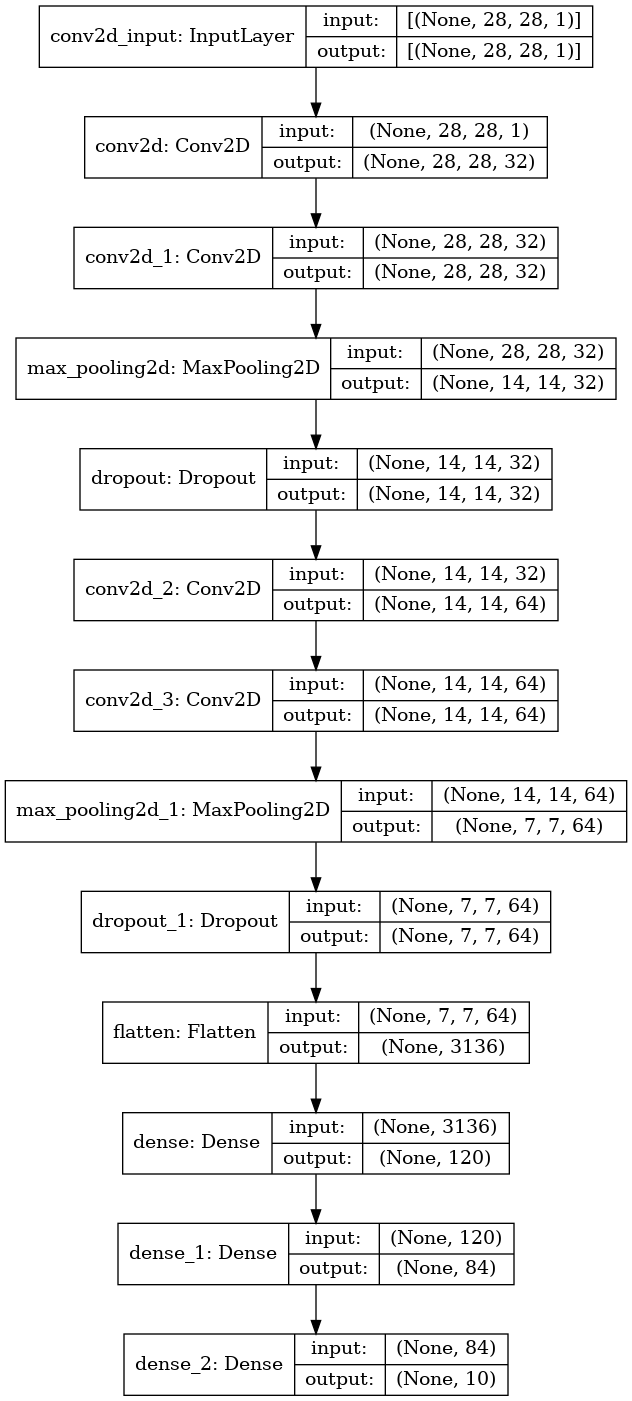

In [23]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model, show_shapes=True)

In [24]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

Augmenting data as to increase our training set with modified data of our present training set

In [25]:
datagen = ImageDataGenerator(
          featurewise_center=False,            
          samplewise_center=False,             
          featurewise_std_normalization=False, 
          samplewise_std_normalization=False,  
          zca_whitening=False,                 
          rotation_range=30,                   # randomly rotate images in the range (degrees, 0 to 180)
          zoom_range = 0.1,                    
          width_shift_range=0.1,               # randomly shift images horizontally (fraction of total width)
          height_shift_range=0.1,              # randomly shift images vertically (fraction of total height)
          horizontal_flip=False,               # randomly flip images
          vertical_flip=False)                 # randomly flip images

datagen.fit(x_train)


In [26]:
ES = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

Will check at the end of each epoch if loss starts increasing. If it does training stops.

In [27]:
epochs = 100
batch_size = 64
history = model.fit(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs=epochs, 
                              validation_data=(x_test,y_test),
                              callbacks=[ES],
                              verbose=1)

2022-08-28 08:44:01.221804: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
525/525 [==============================] - 107s 202ms/step - loss: 0.4271 - accuracy: 0.8595 - val_loss: 0.0707 - val_accuracy: 0.9781
Epoch 2/100
525/525 [==============================] - 105s 200ms/step - loss: 0.1161 - accuracy: 0.9643 - val_loss: 0.0437 - val_accuracy: 0.9856
Epoch 3/100
525/525 [==============================] - 106s 202ms/step - loss: 0.0936 - accuracy: 0.9716 - val_loss: 0.0528 - val_accuracy: 0.9840
Epoch 4/100
525/525 [==============================] - 107s 204ms/step - loss: 0.0774 - accuracy: 0.9760 - val_loss: 0.0455 - val_accuracy: 0.9873
Epoch 5/100
525/525 [==============================] - 105s 200ms/step - loss: 0.0674 - accuracy: 0.9797 - val_loss: 0.0372 - val_accuracy: 0.9890
Epoch 6/100
525/525 [==============================] - 106s 201ms/step - loss: 0.0636 - accuracy: 0.9812 - val_loss: 0.0266 - val_accuracy: 0.9915
Epoch 7/100
525/525 [==============================] - 105s 200ms/step - loss: 0.0576 - accuracy: 0.9825 - val_loss: 0

In [28]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

263/263 [==============================] - 9s 32ms/step - loss: 0.0291 - accuracy: 0.9926
Model loss on the test set: 0.029110068455338478
Model accuracy on the test set: 99.26%


In [29]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.427130,0.859494,0.070689,0.978095
1,0.116135,0.964345,0.043676,0.985595
2,0.093557,0.971637,0.052755,0.984048
3,0.077426,0.976012,0.045482,0.987262
4,0.067442,0.979673,0.037166,0.989048
5,0.063647,0.981191,0.026608,0.991548
6,0.057613,0.982500,0.033890,0.990357
7,0.053894,0.983988,0.026887,0.991667
8,0.052859,0.984196,0.031476,0.991548
9,0.052997,0.984821,0.025519,0.993810


Text(0.5, 1.0, 'Model_8 training curves')

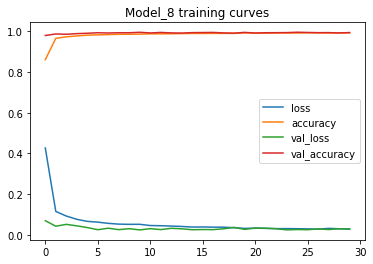

In [30]:
pd.DataFrame(history.history).plot()
plt.title("Model_8 training curves")

In [31]:

import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 

  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] 
  n_classes = cm.shape[0] 

  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) 
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), 
         yticks=np.arange(n_classes), 
         xticklabels=labels, 
         yticklabels=labels)
  
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  threshold = (cm.max() + cm.min()) / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [32]:
y_probs = model.predict(x_test) 


In [33]:
y_preds = y_probs.argmax(axis=1)


In [34]:
import numpy as np
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[2]

9

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=rounded_labels, 
                 y_pred=y_preds)

array([[812,   0,   0,   0,   1,   0,   2,   0,   1,   0],
       [  0, 907,   0,   0,   0,   0,   1,   1,   0,   0],
       [  1,   1, 836,   2,   1,   0,   0,   2,   3,   0],
       [  0,   0,   0, 933,   0,   3,   0,   0,   1,   0],
       [  0,   1,   0,   0, 834,   0,   1,   0,   0,   3],
       [  0,   0,   0,   1,   0, 694,   5,   0,   2,   0],
       [  0,   0,   0,   0,   0,   2, 782,   0,   1,   0],
       [  0,   7,   2,   1,   1,   1,   0, 879,   1,   1],
       [  0,   0,   1,   0,   0,   0,   0,   0, 833,   1],
       [  0,   0,   0,   1,   4,   1,   0,   0,   4, 828]])

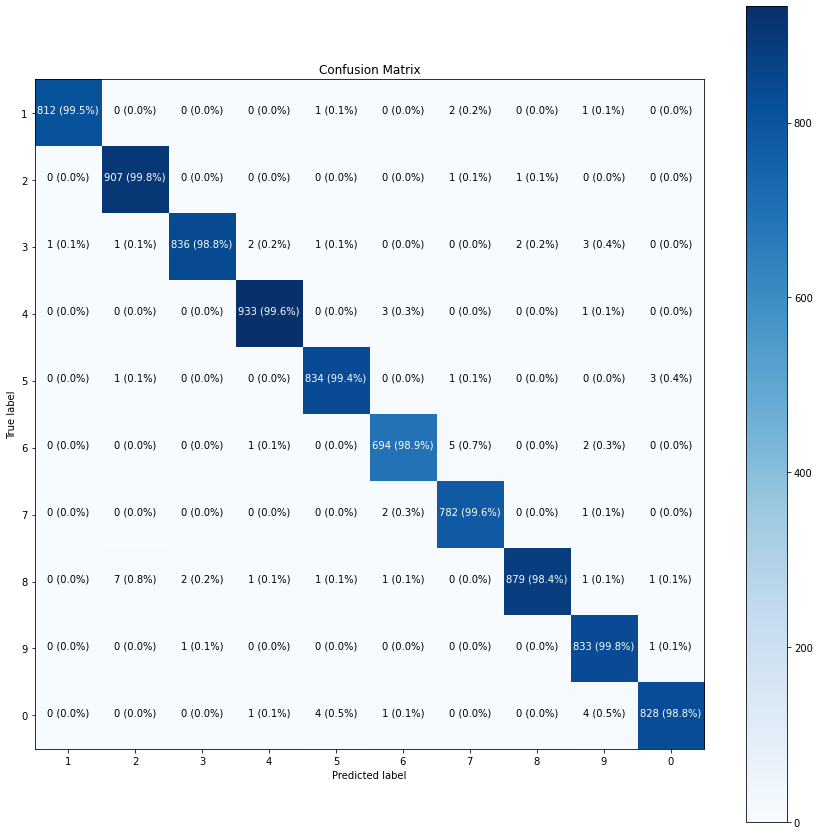

In [36]:
make_confusion_matrix(y_true=rounded_labels, 
                      y_pred=y_preds,
                      classes=[1,2,3,4,5,6,7,8,9,0],
                      figsize=(15, 15),
                      text_size=10)

In [37]:
predictions = model.predict(x_test, verbose=1)

263/263 [==============================] - 7s 28ms/step


In [38]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(rounded_labels,y_preds)
print('Accuracy Score = ', acc_score)

Accuracy Score =  0.9926190476190476
